# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [4]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [6]:
# 觀察相關係數
app_train.corr()['TARGET']

SK_ID_CURR                    -0.002108
TARGET                         1.000000
NAME_CONTRACT_TYPE            -0.030896
FLAG_OWN_CAR                  -0.021851
FLAG_OWN_REALTY               -0.006148
CNT_CHILDREN                   0.019187
AMT_INCOME_TOTAL              -0.003982
AMT_CREDIT                    -0.030369
AMT_ANNUITY                   -0.012817
AMT_GOODS_PRICE               -0.039645
REGION_POPULATION_RELATIVE    -0.037227
DAYS_BIRTH                    -0.078239
DAYS_EMPLOYED                  0.074958
DAYS_REGISTRATION              0.041975
DAYS_ID_PUBLISH                0.051457
OWN_CAR_AGE                    0.037612
FLAG_MOBIL                     0.000534
FLAG_EMP_PHONE                 0.045982
FLAG_WORK_PHONE                0.028524
FLAG_CONT_MOBILE               0.000370
FLAG_PHONE                    -0.023806
FLAG_EMAIL                    -0.001758
CNT_FAM_MEMBERS                0.009308
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893


## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [ ]:
#列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個
print('負相關 top 15'/n,app_train.corr()['TARGET'].sort_values().head(15))
print('正相關 top 15'/n,app_train.corr()['TARGET'].sort_values(ascending=False).head(15))

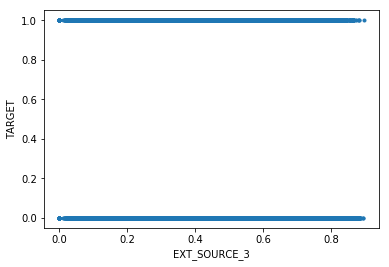

[[nan nan]
 [nan  1.]]


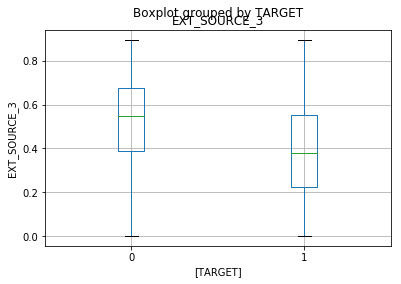

In [8]:
#EXT_SOURCE_3 觀察
#缺值補中位數
app_train['EXT_SOURCE_3'].fillna(app_train['EXT_SOURCE_3'].median())
app_train['TARGET'].fillna(0)
#畫散佈圖
plt.plot(app_train['EXT_SOURCE_3'], app_train['TARGET'],'.')
plt.xlabel('EXT_SOURCE_3')
plt.ylabel('TARGET')
plt.show()
corr = np.corrcoef(app_train['EXT_SOURCE_3'], app_train['TARGET'])

#畫 boxplot 圖
fig,axes = plt.subplots()
app_train.boxplot(column='EXT_SOURCE_3',by=['TARGET'],ax=axes)
# column引數表示要繪製成箱形圖的資料，可以是一列或多列
# by引數表示分組依據

axes.set_ylabel('EXT_SOURCE_3')
#plt.savefig('p3.png')   # 將繪製的圖形儲存為p3.png
print(corr)

In [9]:
#與
print('負相關 top 15',app_train.corr()['AMT_INCOME_TOTAL'].sort_values().head(15))
print('正相關 top 15',app_train.corr()['AMT_INCOME_TOTAL'].sort_values(ascending=False).head(15))

負相關 top 15 OWN_CAR_AGE                   -0.117273
REGION_RATING_CLIENT_W_CITY   -0.091735
REGION_RATING_CLIENT          -0.085465
DAYS_EMPLOYED_ANOM            -0.064038
FLAG_DOCUMENT_6               -0.045878
EXT_SOURCE_3                  -0.030229
DAYS_BIRTH                    -0.027261
DAYS_LAST_PHONE_CHANGE        -0.018585
FLAG_WORK_PHONE               -0.017193
FLAG_DOCUMENT_3               -0.016751
DEF_30_CNT_SOCIAL_CIRCLE      -0.013244
DEF_60_CNT_SOCIAL_CIRCLE      -0.013135
OBS_30_CNT_SOCIAL_CIRCLE      -0.013099
OBS_60_CNT_SOCIAL_CIRCLE      -0.013015
DAYS_EMPLOYED                 -0.013005
Name: AMT_INCOME_TOTAL, dtype: float64
正相關 top 15 AMT_INCOME_TOTAL              1.000000
AMT_ANNUITY                   0.191657
AMT_GOODS_PRICE               0.159610
AMT_CREDIT                    0.156870
FLOORSMIN_AVG                 0.139860
FLOORSMIN_MEDI                0.138489
FLOORSMIN_MODE                0.131800
LIVINGAPARTMENTS_AVG          0.106920
LIVINGAPARTMENTS_MEDI      

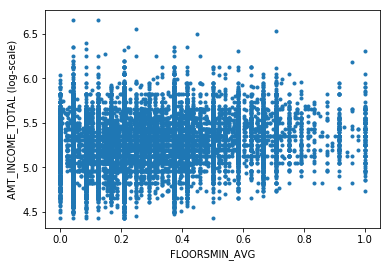

Correlation: 0.1392


In [10]:
#觀察FLOORSMIN_AVG 與 AMT_INCOME_TOTAL 的關係
plt.plot(app_train['FLOORSMIN_AVG'], np.log10(app_train['AMT_INCOME_TOTAL'] ), '.')
plt.xlabel('FLOORSMIN_AVG')
plt.ylabel('AMT_INCOME_TOTAL (log-scale)')
plt.show()
corr = np.corrcoef(app_train['FLOORSMIN_AVG'].fillna(0), np.log10(app_train['AMT_INCOME_TOTAL'].fillna(app_train['AMT_INCOME_TOTAL'].median())))
print("Correlation: %.4f" % (corr[0][1]))

count    104582.000000
mean         12.061091
std          11.944812
min           0.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          91.000000
Name: OWN_CAR_AGE, dtype: float64
202929
   OWN_CAR_AGE  AMT_INCOME_TOTAL
0         26.0           67500.0
1         17.0          171000.0
2          8.0          360000.0
3         23.0          225000.0
4         17.0          157500.0
count    104582.000000
mean         12.061091
std          11.944812
min           0.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          91.000000
Name: OWN_CAR_AGE, dtype: float64
0


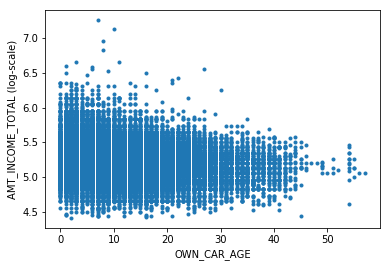

Correlation: -0.2110


In [41]:
#觀察OWN_CAR_AGE 與 AMT_INCOME_TOTAL 的關係
print(app_train['OWN_CAR_AGE'].describe())
print(app_train['OWN_CAR_AGE'].isnull().sum())
#只篩選有車齡的資料
testdf = app_train.loc[:,['OWN_CAR_AGE','AMT_INCOME_TOTAL']].dropna()
testdf.reset_index(inplace=True,drop=True)
print(testdf.head())

print(test_df.describe())
print(test_df.isnull().sum())
#只查看車齡小於60年的資料
mask = (testdf['OWN_CAR_AGE']<=60)
plt.plot(testdf[mask].OWN_CAR_AGE, np.log10(testdf[mask].AMT_INCOME_TOTAL), '.')
plt.xlabel('OWN_CAR_AGE')
plt.ylabel('AMT_INCOME_TOTAL (log-scale)')
plt.show()
corr = np.corrcoef(testdf[mask].OWN_CAR_AGE, np.log10(testdf[mask].AMT_INCOME_TOTAL))
print("Correlation: %.4f" % (corr[0][1]))